# 2D Numpy Arrays

In [13]:
import numpy as np
a = np.ones((3,2))
b = np.array([7,8])
a = np.append(a,[b], axis = 0)
a

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [7., 8.]])

In [31]:
a = np.ones((2,3))
b = np.array([7,8,8])
a = np.vstack((a,b))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [7., 8., 8.]])

In [41]:
a = np.ones((3,2))
b = np.array([[7],[8],[9]])
print(b)
a = np.hstack((a,b))
#c = np.ones((3,1))
#a = np.hstack((a,c))
a

[[7]
 [8]
 [9]]


array([[1., 1., 7.],
       [1., 1., 8.],
       [1., 1., 9.]])

# Here we look at 2 implementations of KMeans
The first uses Pandas DataFrame
The second uses Numpy Arrays

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
# https://bit.ly/3IAI2hJ 

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

column_names = ["X","Y"]
df = pd.DataFrame(data=X, columns=column_names)


def get_random_centroids(data, k = 3):
    
    #return random samples from the dataset
    cent = (data.sample(n = k))
    return cent

get_random_centroids(df, 2)
df.head

<bound method NDFrame.head of             X         Y
0    2.406157  4.870475
1    2.580767  0.828599
2    1.062696  5.176351
3    2.548219  0.900839
4    1.390161  5.084895
..        ...       ...
295  2.614377  1.101643
296  0.584825  4.069215
297  1.187347  1.377842
298  1.623505  0.409868
299  1.288909  3.958315

[300 rows x 2 columns]>

In [12]:
def k_means_fit(X,centroids, n = 5):
    #get a copy of the original data
    X_data = X
    print(X.shape)
    
    diff = 1
    j=0

    while(diff!=0):

        #creating a copy of the original dataframe
        i=1

        #iterate over each centroid point 
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():

                #calculate distance between current point and centroid
                d1=(row_c["X"]-row_d["X"])**2
                d2=(row_c["Y"]-row_d["Y"])**2
                d=np.sqrt(d1+d2)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["X","Y"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['X'] - centroids['X']).sum() + (centroids_new['Y'] - centroids['Y']).sum()
            print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["X","Y"]]
        
    return X, centroids

            X         Y
200  1.413724  4.381177
226  2.963264  1.229543
213  0.736601  4.525821
29   0.192354  5.298666
(300, 2)
-0.030942596788421428
-0.04065796096620905
-0.07543330807492032
-0.024629810551182407
-0.021488049097389827
-0.018859577748342904
0.012244837367356098
0.0


Text(0, 0.5, 'Y')

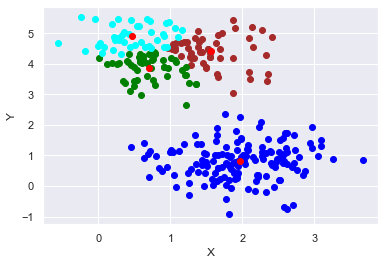

In [13]:
# This is the main Driver for calculating KMeans
centroids = get_random_centroids(df, k = 4)
print(centroids)

clustered, cent = k_means_fit(df,centroids, n= 4)
#setting color values for our 
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent["X"],cent["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

# KMeans Using Numpy Arrays

[1.25566754 3.38204112]
[-1.45672617  7.48669893]
[0.27239604 5.46996004]
[-1.73163168  7.16447286]
targets AAA: [[ 1.25566754  3.38204112]
 [-1.45672617  7.48669893]
 [ 0.27239604  5.46996004]
 [-1.73163168  7.16447286]]
targets: [[ 0.63223041  2.21223868]
 [ 0.19328008  3.59107052]
 [ 0.11906763  3.75945426]
 [-0.00632763  3.96782089]]
targets: [[ 1.48884828  1.06700268]
 [ 0.82843071  1.82526836]
 [ 0.8453954   2.03255294]
 [-0.00632763  3.96782089]]
targets: [[ 2.01151465  0.81936391]
 [ 1.78137824  0.89237431]
 [ 1.71242319  1.01351556]
 [-0.00632763  3.96782089]]
targets: [[ 2.43953315  0.73517585]
 [ 2.1597536   0.67694991]
 [ 1.94385045  0.87306002]
 [-0.00632763  3.96782089]]
targets: [[ 2.71018185  0.94899521]
 [ 2.41493689  0.60850307]
 [ 1.98258281  0.86771314]
 [-0.00632763  3.96782089]]
targets: [[ 2.77551355  1.17706766]
 [ 2.52811623  0.68369212]
 [ 1.98258281  0.86771314]
 [-0.00632763  3.96782089]]
targets: [[ 2.72597188  1.41962941]
 [ 2.64336202  0.91391934]
 [ 1.98

Text(0, 0.5, 'Y')

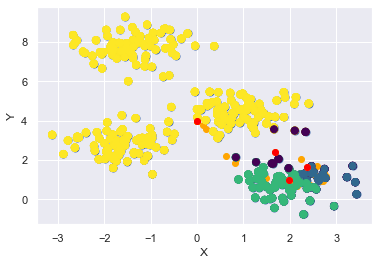

In [2]:
# Create Clusters of points
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # for plot styling
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

# This is another implementation using Numpy Arrays


def createClusters(targets, points):
    targetID = np.zeros((len(points), 1))

    # assign point to target
    for index, point in enumerate(points):
        targetID[index] = getClosest(targets, point)
    return targetID  # this maps points to target

# assign point to closest target


def getClosest(targets, point):
    closest = 0
    dmin = np.infty
    for i in range(len(targets)):
        d = np.linalg.norm(targets[i] - point)
        if d < dmin:
            closest = i
            dmin = d
    return closest


def getRandomPoint(X):
    i = np.random.randint(0, len(X)-1)
    return np.array(X[i])


def updateTargets(X, targetID, targets):
    newTargets = np.zeros((0, 2), float)
    points = np.zeros((0, 2), float)
    rowsTarget = targets.shape[0]
    rowsX = X.shape[0]
    for i in range(0, rowsTarget):
        
        for j in range(0, rowsX):
            clusterID = int(targetID[j])
            if clusterID == i:
                point = X[j]
                points = np.append(points, point)

        k = int(np.ceil(len(points)/2))
        points = points.reshape((k, 2))
        newTargets = np.append(newTargets, points.mean(0))
        
    k = int(len(newTargets)/2)
    return newTargets.reshape((k, 2))


# get k random targets
k = 4
targets = np.zeros((k, 2))
for i in range(k):
    centroid = getRandomPoint(X)
    targets[i] = np.array(centroid)

print(f'Initial targets : {targets}')
# loop until targets don't move
for iter in range(10):
    targetID = createClusters(targets, X)

    plt.scatter(X[:, 0], X[:, 1], c=targetID, s=50, cmap='viridis')

    # update the targets
    targets = np.array(updateTargets(X, targetID, targets))

    # plot centroids
    print(f'targets: {targets}')
    centx = targets[:, 0]
    centy = targets[:, 1]
    plt.scatter(centx, centy, c='orange')
    plt.xlabel('X')
    plt.ylabel('Y')

centx = targets[:, 0]
centy = targets[:, 1]
plt.scatter(centx, centy, c='red')
plt.xlabel('X')
plt.ylabel('Y')